<Strong> Start with a few ,  layers and amonut of neurons in each layer  -> Increase till we see diminishing returns.  </Strong>

In [112]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [113]:
from keras.datasets import imdb
import numpy as np
from keras import models
from keras import layers
import matplotlib.pyplot as plt
from keras import optimizers
from tensorflow.keras import optimizers
from keras import regularizers


# Load the data, keeping only 10,000 of the most frequently occuring words
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

In [114]:
def vectorize_sequences(sequences, dimension=10000):
    
    # List with 25,000 Rows and 10,000 Columns (Max no. of words)
    results = np.zeros((len(sequences), dimension))
    
    #enum and each review (0,[1,2,3,1,23,...])
    for i, sequence in enumerate(sequences):
        
        #Sets specific indices of results[i] to 1 (indices of each sequence (columns of matrix))
        results[i, sequence] = 1.
                
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = test_labels.astype('float32')

In [115]:
x_val = x_train[:10000]
y_val = y_train[:10000]

partial_x_train = x_train[10000:]
partial_y_train = y_train[10000:]

<Strong> Start off with a small network :) </Strong>

In [94]:
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [95]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

In [96]:
epoch = 20
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epoch,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 37ms/step - loss: 0.6291 - accuracy: 0.7262 - val_loss: 0.5718 - val_accuracy: 0.8294
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.5181 - accuracy: 0.8603 - val_loss: 0.4902 - val_accuracy: 0.8634
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.4321 - accuracy: 0.8957 - val_loss: 0.4238 - val_accuracy: 0.8714
Epoch 4/20
30/30 [==============================] - 1s 17ms/step - loss: 0.3635 - accuracy: 0.9075 - val_loss: 0.3774 - val_accuracy: 0.8758
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3112 - accuracy: 0.9177 - val_loss: 0.3407 - val_accuracy: 0.8834
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2697 - accuracy: 0.9248 - val_loss: 0.3137 - val_accuracy: 0.8869
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2373 - accuracy: 0.9319 - val_loss: 0.2986 - val_accuracy: 0.8884
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


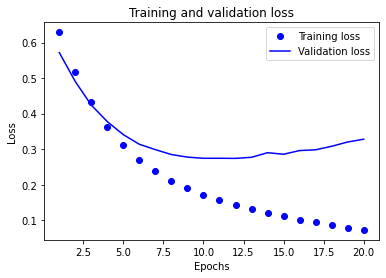

In [97]:
history_dict = history.history
print(history_dict.keys())

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, epoch + 1)


plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [98]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [99]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

In [100]:
epoch = 20
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epoch,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 34ms/step - loss: 0.5189 - accuracy: 0.7806 - val_loss: 0.4146 - val_accuracy: 0.8361
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3085 - accuracy: 0.9020 - val_loss: 0.3060 - val_accuracy: 0.8846
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2259 - accuracy: 0.9259 - val_loss: 0.2773 - val_accuracy: 0.8906
Epoch 4/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1780 - accuracy: 0.9421 - val_loss: 0.2940 - val_accuracy: 0.8825
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1413 - accuracy: 0.9538 - val_loss: 0.2932 - val_accuracy: 0.8847
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1134 - accuracy: 0.9644 - val_loss: 0.3546 - val_accuracy: 0.8692
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0955 - accuracy: 0.9698 - val_loss: 0.3328 - val_accuracy: 0.8813
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


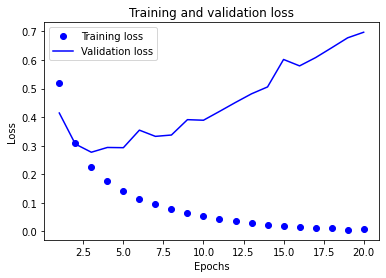

In [101]:
history_dict = history.history
print(history_dict.keys())

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, epoch + 1)


plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<Strong> The smaller network starts over-fitting later than the larger network </Strong>

In [102]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [103]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

In [104]:
epoch = 20
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epoch,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 129ms/step - loss: 0.5394 - accuracy: 0.7593 - val_loss: 0.3610 - val_accuracy: 0.8360
Epoch 2/20
30/30 [==============================] - 3s 116ms/step - loss: 0.2456 - accuracy: 0.9008 - val_loss: 0.2763 - val_accuracy: 0.8870
Epoch 3/20
30/30 [==============================] - 3s 106ms/step - loss: 0.1324 - accuracy: 0.9499 - val_loss: 0.3290 - val_accuracy: 0.8849
Epoch 4/20
30/30 [==============================] - 3s 107ms/step - loss: 0.0787 - accuracy: 0.9725 - val_loss: 0.4924 - val_accuracy: 0.8623
Epoch 5/20
30/30 [==============================] - 3s 100ms/step - loss: 0.1305 - accuracy: 0.9781 - val_loss: 0.4171 - val_accuracy: 0.8574
Epoch 6/20
30/30 [==============================] - 4s 134ms/step - loss: 0.0063 - accuracy: 0.9997 - val_loss: 0.4821 - val_accuracy: 0.8860
Epoch 7/20
30/30 [==============================] - 3s 115ms/step - loss: 7.3040e-04 - accuracy: 0.9999 - val_loss: 0.5803 - val_accuracy: 0.8850
Ep

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


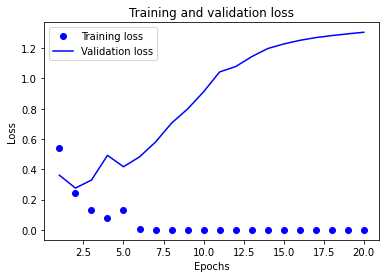

In [105]:
history_dict = history.history
print(history_dict.keys())

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, epoch + 1)


plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [106]:
model = models.Sequential()

model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001) , activation='relu', input_shape=(10000,))) 

model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

In [107]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

In [108]:
epoch = 20
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epoch,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 39ms/step - loss: 0.5618 - accuracy: 0.7875 - val_loss: 0.4555 - val_accuracy: 0.8529
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3703 - accuracy: 0.8964 - val_loss: 0.3692 - val_accuracy: 0.8798
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2923 - accuracy: 0.9195 - val_loss: 0.3379 - val_accuracy: 0.8874
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2549 - accuracy: 0.9332 - val_loss: 0.3296 - val_accuracy: 0.8880
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2339 - accuracy: 0.9415 - val_loss: 0.3317 - val_accuracy: 0.8869
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2158 - accuracy: 0.9469 - val_loss: 0.3349 - val_accuracy: 0.8875
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2000 - accuracy: 0.9535 - val_loss: 0.3412 - val_accuracy: 0.8877
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


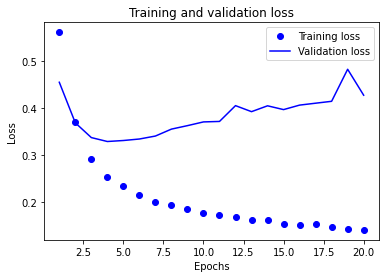

In [109]:
history_dict = history.history
print(history_dict.keys())

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, epoch + 1)


plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<Strong> Using dropout! </Strong>

In [116]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [117]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

In [118]:
epoch = 20
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epoch,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 37ms/step - loss: 0.6411 - accuracy: 0.6217 - val_loss: 0.5348 - val_accuracy: 0.8486
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.5357 - accuracy: 0.7457 - val_loss: 0.4274 - val_accuracy: 0.8756
Epoch 3/20
30/30 [==============================] - 0s 17ms/step - loss: 0.4614 - accuracy: 0.7980 - val_loss: 0.3535 - val_accuracy: 0.8844
Epoch 4/20
30/30 [==============================] - 0s 17ms/step - loss: 0.3978 - accuracy: 0.8333 - val_loss: 0.3110 - val_accuracy: 0.8878
Epoch 5/20
30/30 [==============================] - 1s 17ms/step - loss: 0.3536 - accuracy: 0.8598 - val_loss: 0.2977 - val_accuracy: 0.8855
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3030 - accuracy: 0.8872 - val_loss: 0.2769 - val_accuracy: 0.8897
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2720 - accuracy: 0.9003 - val_loss: 0.2760 - val_accuracy: 0.8892
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


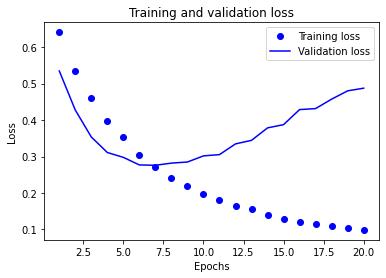

In [119]:
history_dict = history.history
print(history_dict.keys())

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, epoch + 1)


plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
$